# A demo of the pdf $f(x) = \frac{1}{36}(9-x^2)$ for $x \in [-3,3]$

In [24]:
#!pip install sympy

In [113]:
from sympy import symbols, integrate, Rational, Piecewise, lambdify, simplify
x = symbols('x')
u = symbols('u')
f = Rational(1,36) * (9 - u**2)
f

1/4 - u**2/36

In [114]:
F = Piecewise(
        (0, x < -3),                      
        (integrate(f, (u, -3, x)), (x >= -3) & (x <= 3)),  
        (1, x > 3)                     
    )
 
F

Piecewise((0, x < -3), (-x**3/108 + x/4 + 1/2, x <= 3), (1, True))

In [78]:
y_pdf = f.subs(u, 2)
y_pdf

5/36

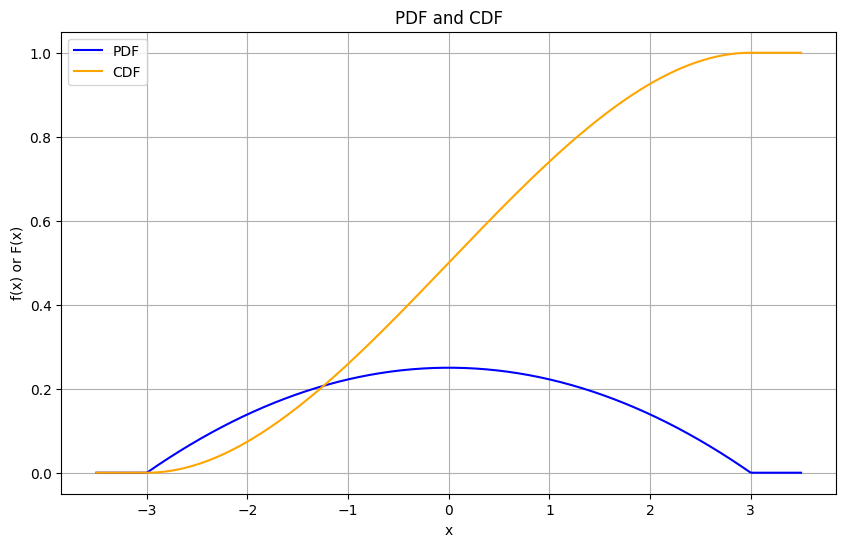

In [115]:
import matplotlib.pyplot as plt
import numpy as np

x_vals = np.linspace(-3.5, 3.5, 400)

y_f = [f.subs(u,k) if -3 <= k <= 3 else 0 for k in x_vals]
y_F = [F.subs(x,k) for k in x_vals]

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_f, label='PDF', color='blue')
plt.plot(x_vals, y_F, label='CDF', color='orange')
plt.title('PDF and CDF')
plt.xlabel('x')
plt.ylabel('f(x) or F(x)')
plt.legend()
plt.grid(True)

plt.show()

# Let's calculate the probability ${\mathbb P}(-1.5 \le X \le 1.5)$

In [116]:
#rough numerically
delta = 0.01
sum([f.subs(u,k)*delta for k in np.arange(-1.5, 1.5, delta)])

0.687498611111111

In [117]:
F.subs(x,1.5) - F.subs(x,-1.5)

0.687500000000000

In [118]:
#alternative way due to the symmetry of the distribution
1 - 2*F.subs(x,-1.5)

0.687500000000000

# The mean

In [122]:
integrate(u*f,(u,-3,3))

0

# The variance

In [121]:
#second moment
integrate((u**2)*f,(u,-3,3))

9/2 - u**2/2